In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Exercicio 1

Aluno - Davi Grumiche Seemann(19206685)

Considere um receptor com potência de ruído de -160dBm na banda de
interesse. Assuma um modelo de path loss do tipo log-distância, onde
d0=1m, fc = 1GHz, e n = 4. Para uma potência de transmissão de
Pt=10mW, encontre a máxima distância entre transmissor e receptor se a
SNR precisa ser maior ou igual a 20dB.

Pode-se assumir espaço livre entre 0m e 1m,

Equação [1]:

$$ 
Pr = {Pt * G_t *G_r * λ \over (4π)^2*d^2 *L}
$$ 

In [2]:
Pt = 0.010
Gt = 1
Gr = 1
fc = 10**9
c = 3*10**8
lambd = c/fc

d0=1
def eq_espaco_livre(Pt, Gt, Gr, lambd, d):
    Pr = (Pt*Gt*Gr*(lambd**2))/(((4*np.pi)**2)*(d**2))

    Pr_dbm = 10*np.log10(Pr/10**-3)
    return Pr_dbm

Pr = eq_espaco_livre(Pt, Gt, Gr, lambd, d0)

print(Pr, "dBm")

-22.441772186048677 dBm


Após isso, utiliza-se a fórmula da atenuação logarítmica de distância abaixo, onde $$  n = 4 ,  d_0 = 1  [m]: $$

$$
PL(d)_{\text{[dB]}} = PL(d_0)_{\text{[dB]}} + 10n \log_{10}\left(\frac{d}{d_0}\right)
$$

Onde:
$$
-22,44 -(160 + 20) = 117,56 dBm = 10 * 4 \log_{10}\left(\frac{d}{1}\right)
$$

In [3]:
Pot_ruido = -160 #dbm
SNR = 20

d = 10**((Pr-(Pot_ruido + SNR))/40) 

print(d, "metros")

868.87178661026 metros


# Exercicio 2

Considerando uma potência de transmissão de 1kW e frequência de
portadora de 1800MHz, trace (em escala log-log) a potência do sinal
recebido para distâncias de 1km a 20km para os seguintes modelos de perda
de percurso:
1. espaço livre;
2. log-distância para n = 3 e n = 4. Use Pr(d0 = 1km) do espaço-livre;
3. Hata (estendido) com altura das antenas de 30m e 2m;
4. log-distância para n = 3 e n = 4. Use Pr(d0 = 1km) do Hata estendido.
Considere ganho das antenas unitário, ambiente urbano.


In [53]:
Pt_2 = 10**3
fc_2 = 1800*10**6
d = np.arange(1000, 21000, 100)
d0_2 = 1e3

Vamos criar as funçoes para cada modelo de perda de percurso e depois plotar o gráfico.

In [54]:
def eq_espaco_livre_2(Pt, Gt, Gr, lambd, d):
    Pr = (Pt * Gt * Gr * (lambd**2)) / (((4 * np.pi) ** 2) * (d**2))
    return Pr

In [55]:
def log_distancia(Pr_d0,d,d0,n):
    Pr = Pr_d0*(d/d0)**(-n)
    return Pr

In [56]:
def hata_extendido(Pt,fcMhz, ht, hr, d):
    ahm = (1.1 * np.log10(fcMhz) - 0.7) * hr - (1.56 * np.log10(fcMhz) - 0.8)
    Lp = (
        69.55
        + 26.16 * np.log10(fcMhz)
        - 13.82 * np.log10(ht)
        - ahm
        + (44.9 - 6.55 * np.log10(ht)) * np.log10(d / 1e3)
    )
    Pr = Pt / (10**(Lp / 10))
    return Pr

In [57]:
espaco_livre = eq_espaco_livre_2(Pt_2, Gt, Gr, c / fc_2, d)

In [58]:
espaco_livre_d0 = eq_espaco_livre_2(Pt_2, Gt, Gr, c / fc_2, d0_2)

In [59]:
log_distancia_n3 = log_distancia(espaco_livre_d0, d, d0_2, 3)
log_distancia_n4 = log_distancia(espaco_livre_d0, d, d0_2, 4)

In [60]:
ht,hr=30,2
hata_extendido_30_2= hata_extendido(Pt_2,fc_2/1e6, ht, hr, d)

Pr0_hata = hata_extendido(Pt_2, fc_2/1e6, ht, hr, d0_2)
log_distancia_n3_hata = log_distancia(Pr0_hata, d, d0_2, 3)
log_distancia_n4_hata = log_distancia(Pr0_hata, d, d0_2, 4)

In [69]:
def watts_to_dbm(watts):
    return 10 * np.log10(watts/0.1)

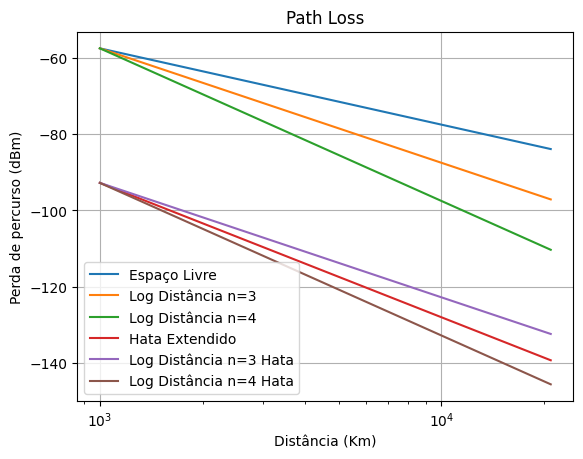

In [70]:
plt.figure()
plt.plot(d, watts_to_dbm(espaco_livre), label="Espaço Livre")
plt.plot(d, watts_to_dbm(log_distancia_n3), label="Log Distância n=3")
plt.plot(d, watts_to_dbm(log_distancia_n4), label="Log Distância n=4")
plt.plot(d, watts_to_dbm(hata_extendido_30_2), label="Hata Extendido")
plt.plot(d, watts_to_dbm(log_distancia_n3_hata), label="Log Distância n=3 Hata")
plt.plot(d, watts_to_dbm(log_distancia_n4_hata), label="Log Distância n=4 Hata")
plt.title("Path Loss")
plt.xscale("log")
plt.legend()
plt.xlabel("Distância (Km)")
plt.ylabel("Perda de percurso (dBm)")
plt.grid()
plt.show()
plt.show()

In [71]:
import pandas as pd
data = {
    "Distância (m)": d,
    "Espaço Livre (dBm)": watts_to_dbm(espaco_livre),
    "Log Distância n=3 (dBm)": watts_to_dbm(log_distancia_n3),
    "Log Distância n=4 (dBm)": watts_to_dbm(log_distancia_n4),
    "Hata Extendido (dBm)": watts_to_dbm(hata_extendido_30_2),
    "Log Distância n=3 Hata (dBm)": watts_to_dbm(log_distancia_n3_hata),
    "Log Distância n=4 Hata (dBm)": watts_to_dbm(log_distancia_n4_hata),
}
filter = np.arange(1000, 21000, 1000)

In [72]:
df = pd.DataFrame(data)
df = df[df["Distância (m)"].isin(filter)]
df

,Distância (m),Espaço Livre (dBm),Log Distância n=3 (dBm),Log Distância n=4 (dBm),Hata Extendido (dBm),Log Distância n=3 Hata (dBm),Log Distância n=4 Hata (dBm)
0,1000,-57.547222,-57.547222,-57.547222,-92.810739,-92.810739,-92.810739
10,2000,-63.567822,-66.578122,-69.588422,-103.414477,-101.841638,-104.851938
20,3000,-67.089647,-71.860860,-76.632072,-109.617266,-107.124376,-111.895589
30,4000,-69.588422,-75.609022,-81.629622,-114.018215,-110.872538,-116.893138
40,5000,-71.526622,-78.516322,-85.506022,-117.431856,-113.779839,-120.769539
50,6000,-73.110247,-80.891760,-88.673272,-120.221004,-116.155276,-123.936789
60,7000,-74.449183,-82.900163,-91.351144,-122.579195,-118.163680,-126.614660
70,8000,-75.609022,-84.639922,-93.670822,-124.621953,-119.903438,-128.934338
80,9000,-76.632072,-86.174498,-95.716923,-126.423793,-121.438014,-130.980439
90,10000,-77.547222,-87.547222,-97.547222,-128.035594,-122.810739,-132.810739
